***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [4]:
df = pd.read_csv('dados/dados.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

In [3]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
(df['Renda'].max()) / 788

253.80710659898477

In [5]:
sm = 788.0
intervalo = [0, (2 * sm), (5 * sm), (15 * sm), (25 *sm), (254 * sm)]
intervalo


[0, 1576.0, 3940.0, 11820.0, 19700.0, 200152.0]

### 2º Definir os labels das classes

In [6]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
frequencia = pd.value_counts(
    pd.cut(x = df.Renda,
    bins= intervalo,
    labels= labels,
    include_lowest= True)
)
frequencia

C:\Users\luist\AppData\Local\Temp\ipykernel_13916\1970992615.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(


Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [8]:
frequencia_percentual = pd.value_counts(
    pd.cut(x = df.Renda,
    bins= intervalo,
    labels= labels,
    include_lowest= True),
    normalize = True
) * 100
frequencia_percentual

C:\Users\luist\AppData\Local\Temp\ipykernel_13916\3180512610.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_percentual = pd.value_counts(


Renda
E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [9]:
distribuição_frequencia_renda = pd.DataFrame(
    {'frequencia': frequencia, 'porcentagem': frequencia_percentual}
)
distribuição_frequencia_renda


,frequencia,porcentagem
Renda,,
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

Text(0.5, 1.0, 'Grafico de distribuição de renda por classes')

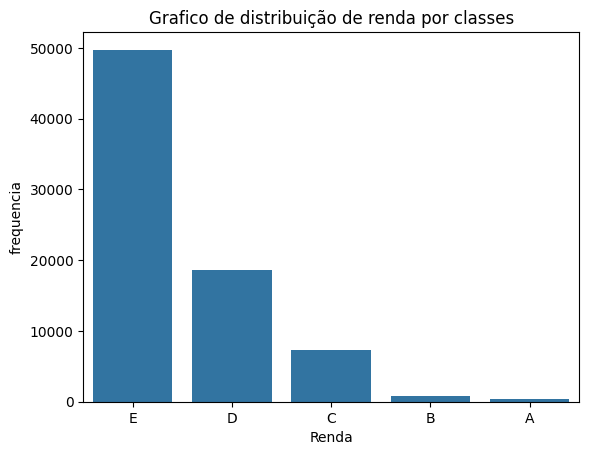

In [10]:
sns.barplot(x = 'Renda', y = 'frequencia', data= distribuição_frequencia_renda)
plt.title('Grafico de distribuição de renda por classes')

> ### Conclusões

no grafico gerado pela levando em conta a distribuição de rendas por classe, classificado por salarios minimos, nota-se que grande parcela da população recebe ate 2 salarios minimos e portanto percenten a classe E. Levando em conta as informaçoes obtidas tambem podemos concluir que quanto amior o numero de filtragem menor a frequencia de aparicoes levando em conta qua a minoria da populaçao sao pertencentes a classe C ou acima da mesma

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<Figure size 1200x600 with 0 Axes>

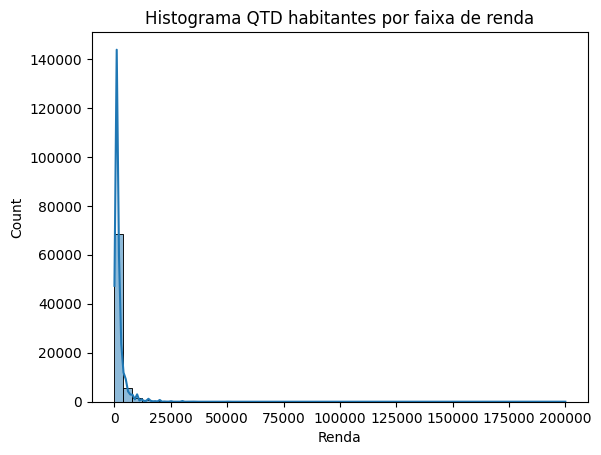

<Figure size 1200x600 with 0 Axes>

In [11]:
sns.histplot(df.Renda , kde = True, bins= 50)
plt.title('Histograma QTD habitantes por faixa de renda')
plt.figure(figsize=(12, 6))

<Figure size 1600x800 with 0 Axes>

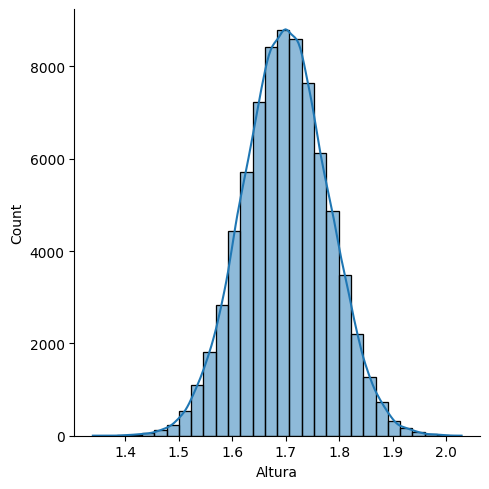

<Figure size 1600x800 with 0 Axes>

In [12]:
sns.displot(df.Altura, kde = True, bins= 30)
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

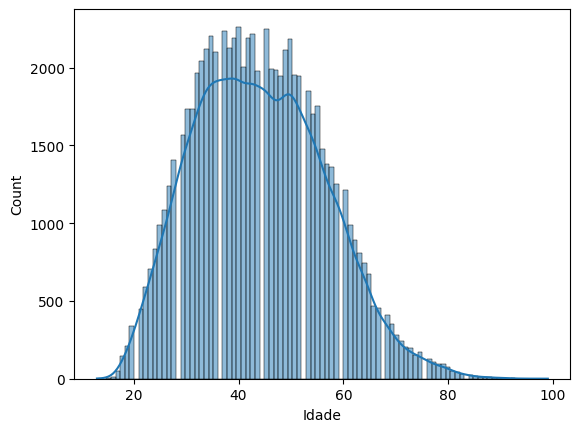

<Figure size 1600x800 with 0 Axes>

In [13]:
sns.histplot(df['Idade'], kde=True)
plt.figure(figsize= (16, 8))

> ### Conclusões

grafico 1- da pra se notar a descrepancia entre a quantidade de pessoas que possuem uma renda equivalentes ate 4 salarios mininos e uma minoria que possui salarios altos e que distorcem o grafico
grafico 2- da pra se notar uma diserção de dados da altura quase que equivalentes tanto abaixo do 1,70 onde nota-se que pode ser a media quanto acima dela
grafico 3 - disperção de dados com uma tendencia focada em pontos que geralmente significam algum final de ciclo

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<Figure size 1200x600 with 0 Axes>

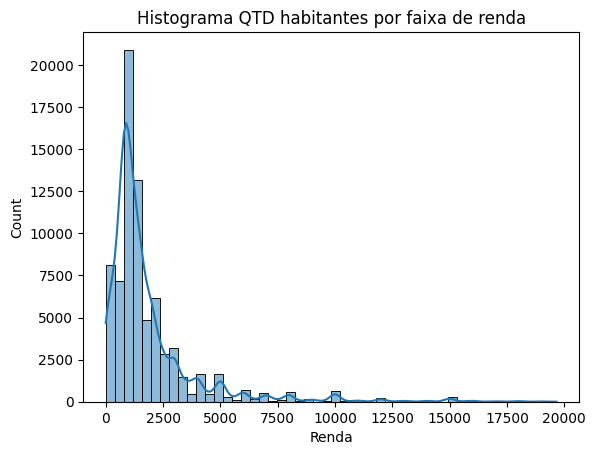

<Figure size 1200x600 with 0 Axes>

In [14]:
sns.histplot(df.query('Renda < 20000').Renda , kde = True, bins= 50)
plt.title('Histograma QTD habitantes por faixa de renda')
plt.figure(figsize=(12, 6))

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [15]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [16]:

frequencia = pd.crosstab(df.Cor, df.Sexo)
frequencia.rename(columns=sexo, inplace=True)
frequencia.rename(index=cor, inplace=True)
frequencia

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [17]:
frequencia = pd.crosstab(df.Cor, df.Sexo, normalize=True)*100
frequencia.rename(columns=sexo, inplace=True)
frequencia.rename(index=cor, inplace=True)
frequencia

Sexo,Masculino,Feminino
Cor,,
Indígena,0.333160,0.131442
Branca,28.883394,12.520822
Preta,7.160333,3.759761
Amarela,0.305830,0.152264
Parda,32.617126,14.135867


> ### Conclusões

da pra se notar com a extração desses dados que a massa das regioes pesquisadas sao contituidos de povos com a cor parda e branca sendo assim tanto para homens quanto para mulheres.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [18]:
df.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [19]:
df.Renda.median()

1200.0

### Obtenha a moda

In [20]:
df.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [21]:
v1 = df.Renda - df.Renda.mean()
v2 = v1.abs()
v2.mean()

1526.4951371638058

### Obtenha a variância

In [22]:
df.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [23]:
df.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [24]:
agrupamento = df.groupby(['Sexo', 'Cor'])[['Renda']].mean()
# agrupamento.reset_index()
agrupamento

Renda
Sexo Cor             
0    0    1081.710938
     2    2925.744435
     4    1603.861687
     6    4758.251064
     8    1659.577425
1    0    2464.386139
     2    2109.866750
     4    1134.596400
     6    3027.341880
     8    1176.758516

In [25]:
grupo_3 = pd.crosstab(df.Cor, df.Sexo,
            values = df.Renda,
            aggfunc = {'mean', 'median', 'max'})
grupo_3.rename(index=cor, inplace=True)
grupo_3.rename(columns=sexo, inplace=True)
grupo_3

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [26]:
grupo_4 = pd.crosstab(df.Cor, df.Sexo,
            values = df.Renda,
            aggfunc = {'var', 'std'})
grupo_4.rename(index=cor, inplace=True)
grupo_4.rename(columns=sexo, inplace=True)
grupo_4

std                         var              
Sexo        Masculino      Feminino     Masculino      Feminino
Cor                                                            
Indígena  1204.093490  11957.498292  1.449841e+06  1.429818e+08
Branca    4750.791872   3251.013154  2.257002e+07  1.056909e+07
Preta     1936.309271   1349.799809  3.749294e+06  1.821960e+06
Amarela   5740.824820   3731.173660  3.295707e+07  1.392166e+07
Parda     2312.087184   1596.233048  5.345747e+06  2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

C:\Users\luist\AppData\Local\Temp\ipykernel_13916\2032118803.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)


<Axes: xlabel='Renda', ylabel='Cor'>

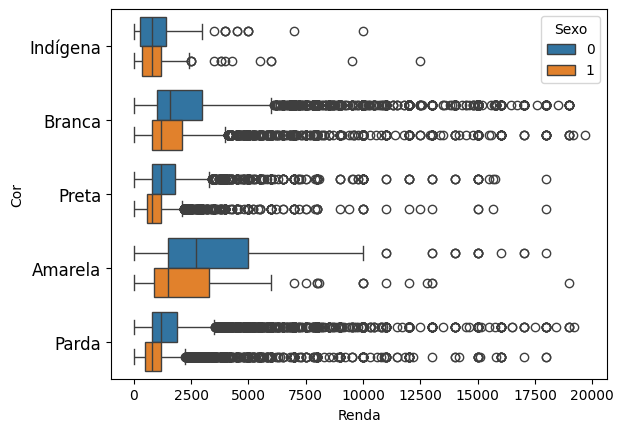

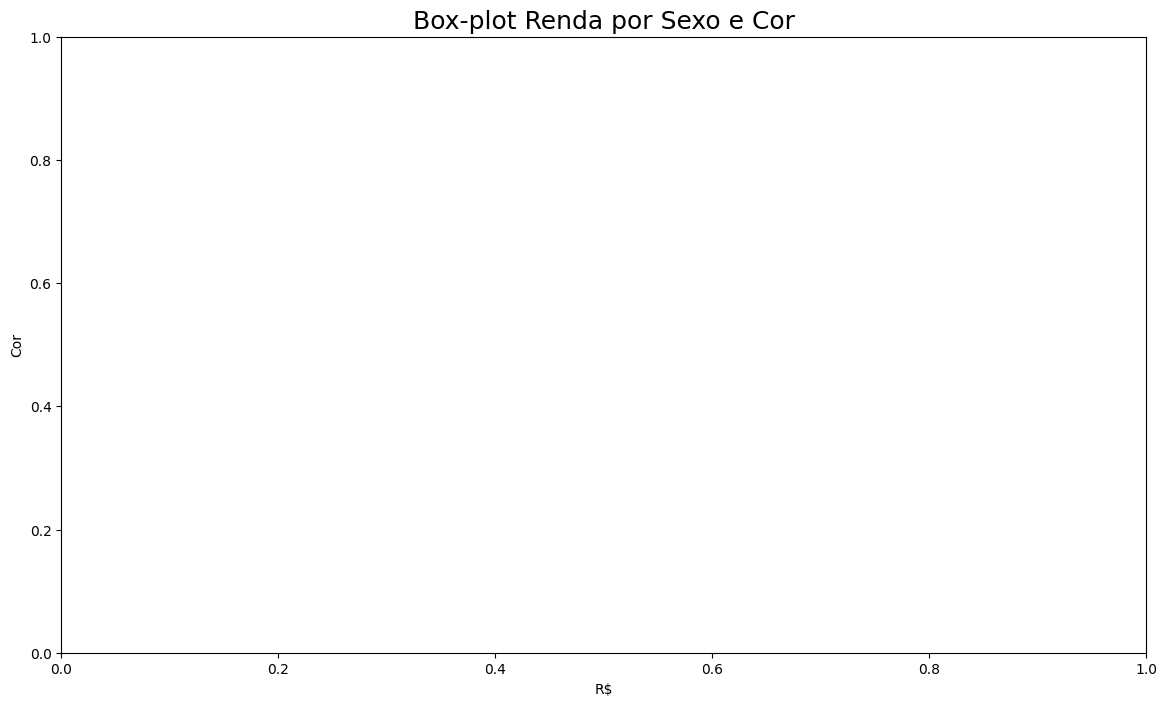

In [27]:
ax = sns.boxplot(x= 'Renda', y= 'Cor', hue='Sexo', data=df.query('Renda < 20000'), orient= 'h')
plt.figure(figsize=(14, 8))
plt.title('Box-plot Renda por Sexo e Cor', fontsize= 18)
plt.xlabel('R$')
plt.ylabel('Cor')
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)

ax

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [34]:
import scipy

ModuleNotFoundError: No module named 'scipy'

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...